### Integrantes

- Dayana Gonzalez
- Juan Manuel Ramirez

# Taller Vecinos más cercanos (KNN)

Usamos el método de vecinos más cercanos para clasificación. Por un lado, analizamos el Iris Dataset sobre especies de flores. Por el otro lado analizamos la supervivencia en la tragedia del Titanic utilizando diferentes valores de K. 

Importamos primero las librerías y paquetes que utilizaremos. Puede importar otros si lo considera útil.

In [1]:
#importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Iris Dataset

Importamos el conjunto de datos desde sklearn.




In [21]:
#importar dataset
from sklearn.datasets import load_iris

In [22]:
#Importar iris dataset y separar en data y target
iris = load_iris()
X=pd.DataFrame(iris.data)
y=pd.DataFrame(iris.target)

Primero separamos el conjunto de datos en Train y Test, en una proporción de 70%, 30%.

In [23]:
#Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Importamos el classificador KNeighborsClassifier de SKLearn con el nombre *knn*. Usar k=3.


In [43]:
#TODO1 importar KNeighborsClassifier con k=3 con el nombre knn
neigh = KNeighborsClassifier(n_neighbors=3)

Entrenamos el clasificador con los datos de entrenamiento.

In [44]:
#TODO2 entrenar knn con los datos de entrenamiento
neigh.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

Calculamos la exactitud del modelo en los datos Test, con el método *score* del clasificador.

In [45]:
#TODO3 calcular la exactitud (score) del modelo en los datos test.
neigh.score(X_test, y_test)

0.9777777777777777

**TODO 4**: Observe los diagramas de dispersión del Iris datset [aquí](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris).¿Cree que la exactitud mejorará con un k más pequeño?¿Cree que mejorará con un K más grande? ¿Por qué?

No mejorará debido a que el dataset original muestra separaciones bastante claras en varias variables entre las 3 especies. Un k más pequeño generaría un analisis individualizado genrando un efecto peor o similar al de k=3. Tomando un k mas grande, por ejemplo 100, se encuentra que depende de demasiados vecinos para definir su agrupacion lo cual ya tiende a incluir observaciones de otras especies.

## Titanic Dataset
Ahora analizamos la supervivencia en el naufragio del Titanic. El conjunto de datos, así como el diccionario de atributos, puede verlos [aquí](https://www.kaggle.com/competitions/titanic/data).

*Observación* Usaremos sólo el conjunto Train proporcionado en Kaggle para la fase Test y Train en el taller.

In [115]:
#importar los datos de entrenamiento del Titanic Dataset.
df=pd.read_csv("train.csv")


Eliminar del dataframe las filas con valores ausentes (NaN).

In [116]:
#TODO5 Remover filas con valores ausentes.
df= df.dropna()

Explorar el dataset mediante su visualización, el uso de los métodos *head*, *info* y *value_counts* para los Dataframes en pandas y sus columnas. ¿Qué tipo de variables tiene? qué caracteriza a los valores de dichas variables? ¿Qué tipos de datos se usan?

In [117]:
#TODO6 Explorar el dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [119]:
df['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [120]:
df['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

In [121]:
df['Pclass'].value_counts()

1    158
2     15
3     10
Name: Pclass, dtype: int64

In [122]:
df['SibSp'].value_counts()

0    110
1     64
2      6
3      3
Name: SibSp, dtype: int64

In [123]:
df['Parch'].value_counts()

0    122
1     37
2     23
4      1
Name: Parch, dtype: int64

In [124]:
df['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

**TODO7**: ¿Cuáles considera, de acuero a su intuición que son las variables más relevantes para predecir la columna 'Survived'? ¿Cuáles considera irrelevantes?¿Por qué?

In [163]:
#Separar la columna objetivo.
X=df.drop('Survived',axis=1)
y=df['Survived']

In [164]:
#TODO8 Remover columnas que usted considera irrelevantes.
X=X.drop(['Name','PassengerId','SibSp','Ticket','Fare','Cabin','Embarked'],axis=1)

Convertimos a dummies las columnas categóricas. Nos aseguramos de que las originales no permanezcan en la tabla. Se sugiere usar el parámetro drop_first = True si está trabajando con Getdummies. ¿Por qué cree que es conveniente usar este parámetro?

In [165]:
X.head()

,Pclass,Sex,Age,Parch
1,1,female,38.0,0
3,1,female,35.0,0
6,1,male,54.0,0
10,3,female,4.0,1
11,1,female,58.0,0


In [166]:
#TODO9 Convertir a dummies. Asegurarse de eliminar las columnas originales. Se sugiere usar el parámetro drop_first=True si se está trabajando con getdummies.
X['Pclass'] = X['Pclass'].astype('category')
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Parch,Pclass_2,Pclass_3,Sex_male
1,38.0,0,0,0,0
3,35.0,0,0,0,0
6,54.0,0,0,0,1
10,4.0,1,0,1,0
11,58.0,0,0,0,0


In [167]:
#Imprimir info de X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       183 non-null    float64
 1   Parch     183 non-null    int64  
 2   Pclass_2  183 non-null    uint8  
 3   Pclass_3  183 non-null    uint8  
 4   Sex_male  183 non-null    uint8  
dtypes: float64(1), int64(1), uint8(3)
memory usage: 4.8 KB


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, shuffle=True)

Ahora entrenamos clasificadores de KNN con diferentes valores de k y visualizamos el cambio entre ellos.

In [169]:
#TODO10 para k entre 1 y 100, entrenar knn en los datos de entrenamiento. Calcular sus respectivos scores
# Guardar los scores en una lista llamada "scores".
scores = []
for i in range(100):
    neigh = KNeighborsClassifier(n_neighbors=i+1)
    neigh.fit(X_train, y_train)
    scores.append(neigh.score(X_test,y_test))
    

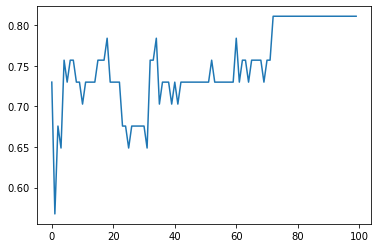

In [170]:
#Graficar scores
plt.plot(scores)

**TODO11** ¿Qué se puede concluir a partir de la gráfica anterior?

*R/* A partir de la gráfica podemos concluir que la mejor presición se encuentra tomando un K mayor a 80. 

**TODO12:** Determinar si las siguientes afirmaciones son verdaderas o falsas. Justificar su respuesta.

- El score en el test set de 1-NN siempre será menor o igual que el de 5-NN.  

**FALSO.** Depende de como los datos esten distribuidos.

- El tiempo para clasificar una muestra del testset con k-NN crece con el tamaño del train set.

**TRUE.** Porque, el tiempo de ejecución de una Query en K-NN es de Log(n)+K, lo cual es una muy buena complejidad computacional.

## Titanic dataset usando pesos en la distancia.

A continuación usamos clasificadores de KNN dándole pesos a las distancias. 

**TODO13:** ¿Nota alguna diferencia con la clasificación sin pesos en las distancias? ¿Alguna hipótesis sobre el porqué?

In [171]:
# Weighted k-nn
scores=[]
for n in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
  knn.fit(X_train,y_train)
  s=knn.score(X_test,y_test)
  scores.append(s)
  print(s)

0.7297297297297297
0.6756756756756757
0.6756756756756757
0.6756756756756757
0.7567567567567568
0.7297297297297297
0.7567567567567568
0.7567567567567568
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7567567567567568
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7567567567567568
0.7567567567567568
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567

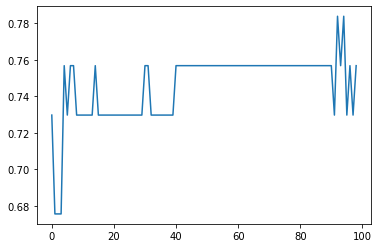

In [172]:
#Graficar
plt.plot(scores)

**R/** Podemos darnos cuenta en comparación con el punto anterior que al tomar los pesos, verificando las distancias, la presición tiene niveles mas bajos y ahora se encuentra en valores mas especificos de K-NN entre 90 y 95 mostrando una caida despues. Esto puede estar sucediendo, ya que al considerar la distancia entre los vecinos se penaliza mas la inclusion de datos mas anomalos.